<a href="https://colab.research.google.com/github/Rocaleta5/PDS_1/blob/main/PDS_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.-Proyecto final: Análisis de salarios en el área del manejo de data.

--------------------------------------------------------------------------------

## Descripción
En este proyecto se explorará el conjunto de datos “Data Job Salaries”, esto con el propósito de identificar los factores que influyen en los ingresos de cada rol dentro del campo de manejo de datos.

Muchas personas comienzan a interesarse por trabajar en el área de manejo de datos, sin embargo, no todos conocen los diversos roles que existen en este campo ni los salarios que comúnmente reciben, así como la modalidad de trabajo más común entre ellas. Es por ello que un análisis de los aspectos más representativos de cada rol puede ayudar a que los individuos puedan ir por el que mejor se acomode a sus necesidades.

--------------------------------------------------------------------------------

##Audiencia

Este proyecto va dirigido a aquellas personas que quiera conocer un poco mejor los ingresos que reciben los diferentes roles dentro del campo de manejo de datos, asimismo como los principales lugares y modalidades en las que se desarrollan algunos de estos roles.
________________________________________________________________________________

## Preguntas que se buscan resolver

El propósito principal de este proyecto es apoyar a todo aquel que este interesado en entrar al mundo de la DATA a poder tomar una decisión que más se acomode a sus necesidades o preferencias, o bien conocer un poco mejor de aquellos roles que le interesaría desempeña; para ello buscaremos responder las siguientes preguntas.

* ¿Cuáles son los roles con una media de salario más alta?
* ¿Qué países son los que presentan una mayor cantidad de personas en el área del manejo de datos?
* ¿En que roles el trabajo de manera remota es más común?
* ¿En que países las empresas presentan un salario mas alto?
--------------------------------------------------------------------------------

Autor: Luis Rodrigo Sanchez Valdes

# 2.- Importación de librerias y datos.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#----------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc

# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
%cd "gdrive/MyDrive/PFCD"

/content/gdrive/MyDrive/PFCD


In [6]:
df = pd.read_csv("salaries.csv")
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Research Scientist,300200,USD,300200,US,0,US,M
1,2024,SE,FT,Research Scientist,170700,USD,170700,US,0,US,M
2,2024,SE,FT,Data Scientist,251600,USD,251600,US,0,US,M
3,2024,SE,FT,Data Scientist,120100,USD,120100,US,0,US,M
4,2024,MI,FT,Data Engineer,120470,USD,120470,US,0,US,M
5,2024,MI,FT,Data Engineer,86330,USD,86330,US,0,US,M
6,2024,MI,FT,Data Scientist,223500,USD,223500,US,0,US,M
7,2024,MI,FT,Data Scientist,109100,USD,109100,US,0,US,M
8,2024,SE,FT,Data Scientist,223500,USD,223500,US,0,US,M
9,2024,SE,FT,Data Scientist,109100,USD,109100,US,0,US,M


# 3.- Analisis Exploratorio de Datos.

El conjunto de datos contiene 11 columnas con las siguientes características:

1. **work_year:** El año en que se pagó el salario.

2. **experience_level:** El nivel de experiencia en el trabajo durante el año, con los siguientes valores posibles:

   * ES: Nivel inicial / Junior
   * MI: Nivel Medio / Intermedio
   * SE: Nivel Superior/ Experto
   * EX: Nivel Ejecutivo / Director

3. **employment_type:** El tipo de empleo para el rol:

   * PT: Tiempo parcial
   * FT: Tiempo completo
   * CT: Contrato
   * FL: Independiente

4. **job_title:** El puesto trabajado durante el año.

5. **salary:** El monto total del salario bruto pagado.

6. **salary_currency:** La moneda del salario pagado como código de moneda ISO 4217.

7. **salary_in_usd:** El salario en USD (tipo de cambio dividido por el tipo de cambio promedio en USD del año respectivo a través de datos de fxdata.foorilla.com).

8. **employee_residence:** País de residencia principal del empleado durante el año laboral como código de país ISO 3166.

9. **remote_ratio:** La cantidad total de trabajo realizado de forma remota, los valores posibles son los siguientes:
  * 0: Sin trabajo remoto (menos del 20%)
  * 50: Parcialmente remoto/híbrido
  * 100: Totalmente remoto (más del 80%)

10. **company_location:** El país de la oficina principal del empleador o sucursal contratante como código de país ISO 3166.

11. **company_size:** El número medio de personas que trabajaron para la empresa durante el año:
  * S: Menos de 50 empleados (pequeño/small)
  * M: 50 a 250 empleados (mediano/medium)
  * L: más de 250 empleados (grande/large)

  ______________________________________________________________________________

  # Información general del conjunto de datos inicial.

In [7]:
# Tamaño del conjunto de datos
print("Filas, columnas: ", df.shape)

# Nombres de las variables
print("\nNombres de las variables: \n", df.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", df.dtypes)

# Verificar la presencia de valores faltantes
print("\nValores faltantes: \n", df.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", df['salary'].describe())
print("\nEstadísticas descriptivas: \n", df['salary_in_usd'].describe())

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

Filas, columnas:  (26043, 11)

Nombres de las variables: 
 Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Tipos de datos: 
 work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Valores faltantes: 
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Estadísticas descriptivas: 
 count    2.604300e+04
mean     

# 3.1 limpieza de datos poco utiles

 Se eliminan las variables que se repiten pocas veces, pues se considera que su aportación al analisis es innecesario.

**Tomaremos como límite de interes que el país aparezca por lo menos 60 veces en todo el conjunto de datos**

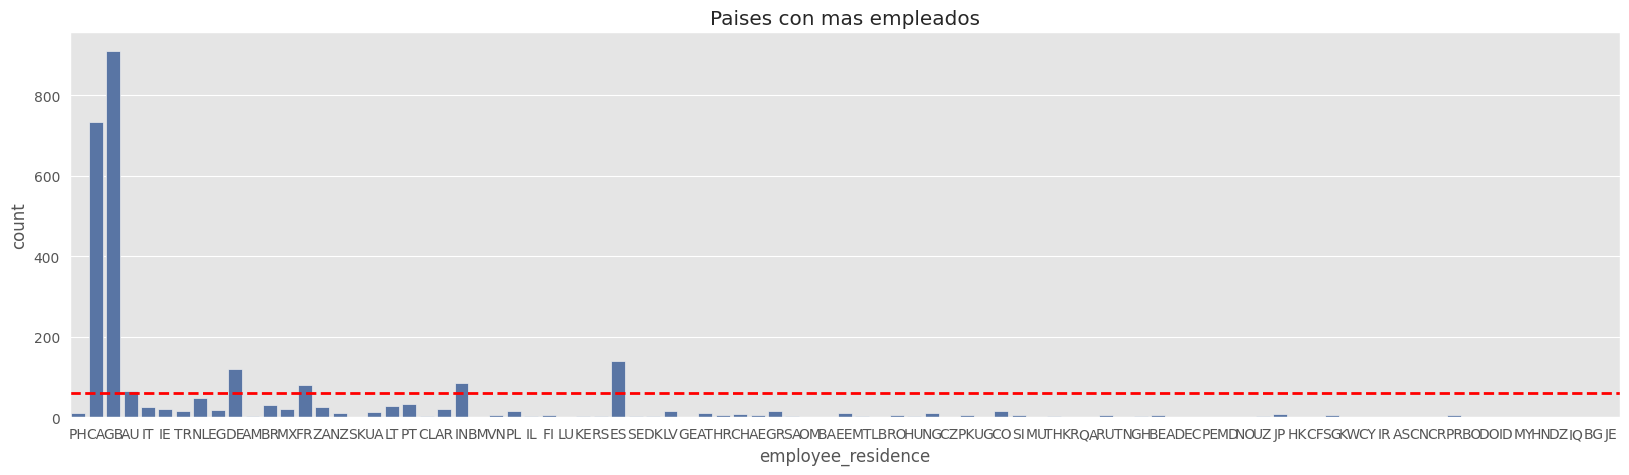

In [8]:
#Se eliminan las variables que se repiten pocas veces, pues se considera que su aportación al analisis es inncesecario

df_1 = df[df['employee_residence']!='US'] #Se buscan los lugares de residencia más comunes excluyendo a US (Estados Unidos)

fig, ax = plt.subplots(figsize=(20, 5))
plt.title ('Paises con mas empleados')
sns.countplot(x='employee_residence', data=df_1)

limite = 60
ax.axhline(limite, color='red', linestyle='--',linewidth=2, label=f'Límite de interés: {limite}')

plt.show()

### Quedando así con un total de 8 países:


1. Estados Unidos (US)
2. Gran Bretaña (GB)
3. Cánada (CA)
4. España (ES)
5. Alemania (DE)
6. India (IN)
7. Francia (FR)
8. Australia (AU)

In [9]:
counts = df['employee_residence'].value_counts()
main_countries = df[df['employee_residence'].isin(counts[counts >= 60].index)]

print (main_countries['employee_residence'].value_counts())

employee_residence
US    23306
GB      911
CA      733
ES      141
DE      120
IN       85
FR       80
AU       66
Name: count, dtype: int64


In [10]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,26043.000000,2.604300e+04,26043.000000,26043.000000
mean,2023.508889,1.621397e+05,153136.368352,26.876704
std,0.679686,2.747089e+05,68751.761855,44.055748
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.050000e+05,105000.000000,0.000000
50%,2024.000000,1.450000e+05,145000.000000,0.000000
75%,2024.000000,1.935730e+05,192450.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


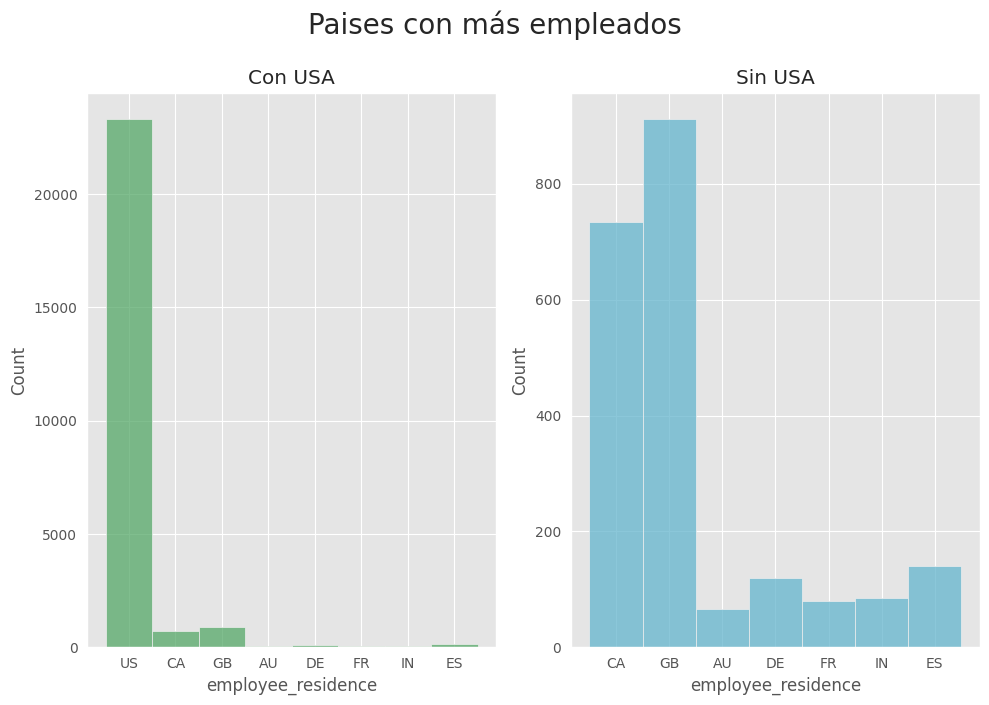

In [11]:
#plt.title ('Paises con mas empleados')
#sns.histplot(x='employee_residence', data=main_countries)
 ## Plot de seaborn, por si las dudas

main_countries_no_us = main_countries[main_countries['employee_residence'] != 'US']

fig, axs = plt.subplots(ncols=2, figsize=(10,7))
fig.suptitle('Paises con más empleados', fontsize=20, y=1.0)

sns.histplot(x=main_countries['employee_residence'], ax=axs[0], color='#55A868')
sns.histplot(x=main_countries_no_us['employee_residence'], ax=axs[1], color='#64B5CD')

axs[0].set_title('Con USA')
axs[1].set_title('Sin USA')

plt.tight_layout()
plt.show()

In [12]:
print(main_countries['job_title'].value_counts()) #Tambien hay varios que se repiten muy pocas veces, por lo que se eliminarán.

job_title
Data Scientist                     5767
Data Engineer                      4923
Data Analyst                       3440
Machine Learning Engineer          2608
Research Scientist                 1071
                                   ... 
Compliance Data Analyst               1
Big Data Developer                    1
Consultant Data Engineer              1
Staff Machine Learning Engineer       1
Software Data Engineer                1
Name: count, Length: 173, dtype: int64


### Repetimos el proceso con los "job_titles"

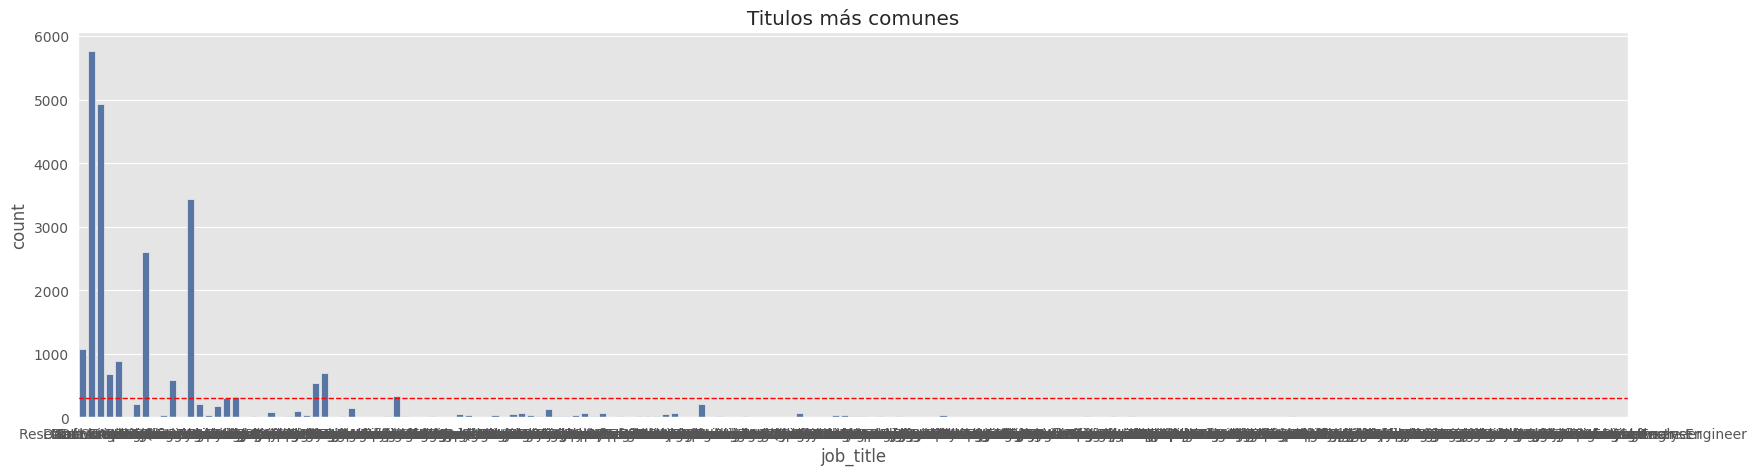


Los titulos restantes después de la depuración son los siguientes:
-------------------------------------------------------------------------------------------------
job_title
Data Scientist                    5767
Data Engineer                     4923
Data Analyst                      3440
Machine Learning Engineer         2608
Research Scientist                1071
Software Engineer                  881
Applied Scientist                  707
Data Architect                     681
Analytics Engineer                 594
Research Engineer                  538
Business Intelligence Engineer     336
Business Intelligence Analyst      319
Data Manager                       301
Name: count, dtype: int64


In [13]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.title ('Titulos más comunes')
sns.countplot(x='job_title', data=main_countries)

limite = 300  #Tomamos como limite 300 apariciones en el conjunto de datos
ax.axhline(limite, color='red', linestyle='--',linewidth=1, label=f'Límite de interés: {limite}')

plt.show()

print('\nLos titulos restantes después de la depuración son los siguientes:\n-------------------------------------------------------------------------------------------------')
counts = main_countries['job_title'].value_counts()
df_2 = main_countries[main_countries['job_title'].isin(counts[counts >= 300].index)]

print (df_2['job_title'].value_counts())

<Axes: title={'center': 'Titulos más comunes'}, xlabel='job_title', ylabel='count'>

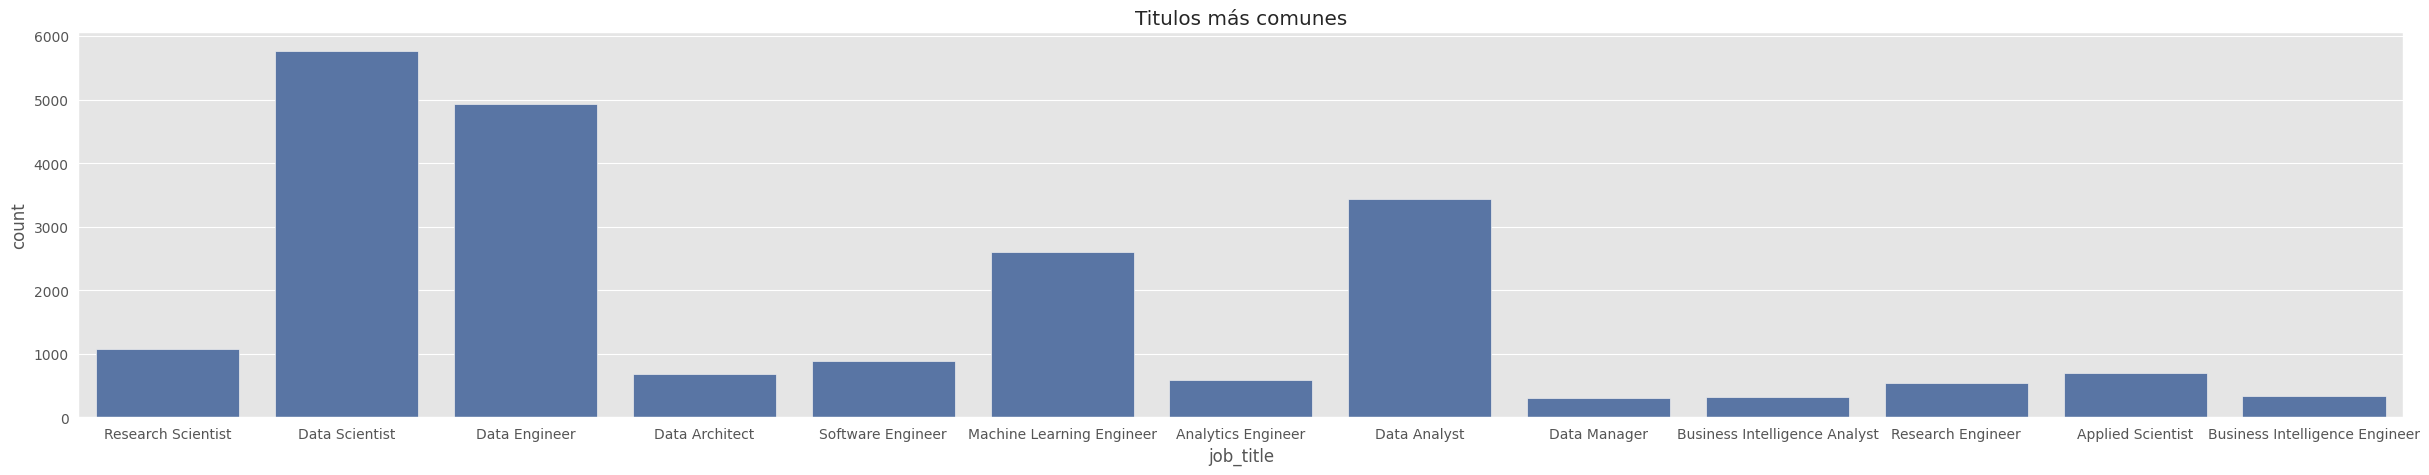

In [14]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.title ('Titulos más comunes')
sns.countplot(x='job_title', data=df_2)

# 3.2 Información general del conjunto de datos post-limpieza.

In [15]:
# Tamaño del conjunto de datos
print("Filas, columnas: ", df_2.shape)

# Nombres de las variables
print("\nNombres de las variables: \n", df_2.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", df_2.dtypes)

# Verificar la presencia de valores faltantes
print("\nValores faltantes: \n", df_2.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", df_2['salary'].describe())
print("\nEstadísticas descriptivas: \n", df_2['salary_in_usd'].describe())

# Frecuencia de valores únicos en las variables categóricas
for col in df_2.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df_2[col].value_counts())

Filas, columnas:  (22166, 11)

Nombres de las variables: 
 Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Tipos de datos: 
 work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Valores faltantes: 
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Estadísticas descriptivas: 
 count    2.216600e+04
mean     

# 3.3 Análisis de valores atípicos

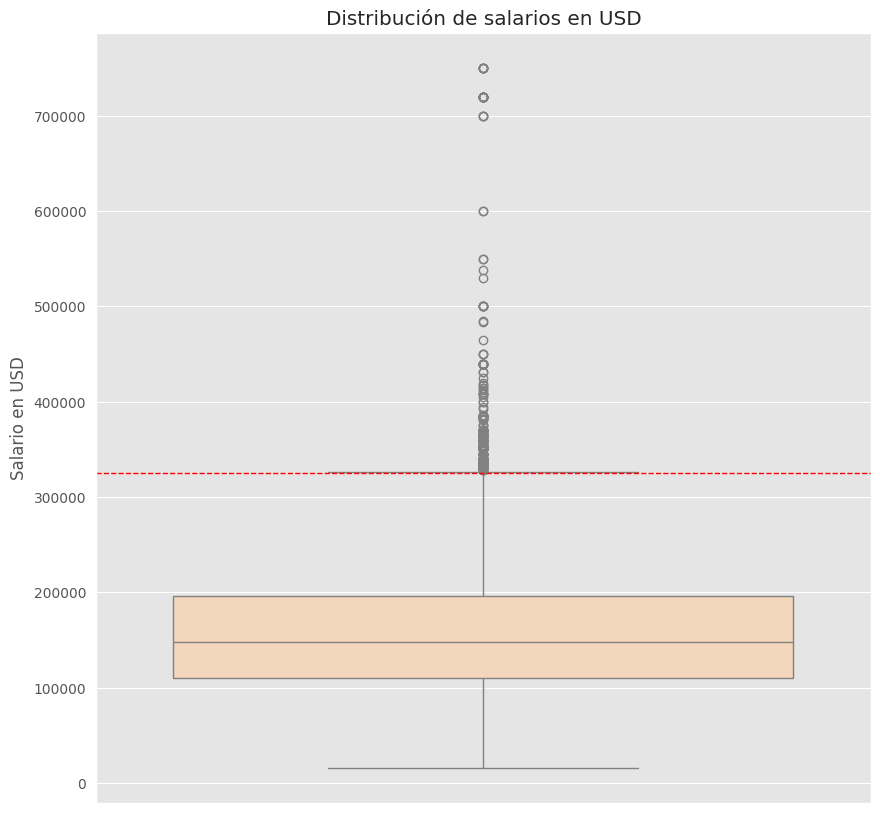

In [16]:
slr_max = 325000
slr_min = df_2['salary_in_usd'].min()
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y=df_2['salary_in_usd'], color='#FDD5B1')
ax.axhline(slr_max, color='red', linestyle='--',linewidth=1, label=f'Límite de interés: {slr_max}')
plt.title('Distribución de salarios en USD')
plt.ylabel('Salario en USD')
plt.show()


Se eliminaran los outliers, pues al ser casos extraordinarios y exageradamente altos a la media, pueden afectar a el resultado a la hora de predecir los salarios.

In [43]:
df_2 = df_2[ df_2['salary_in_usd'] <= 315000]

#df_2.sort_values(by='salary_in_usd', ascending=False)

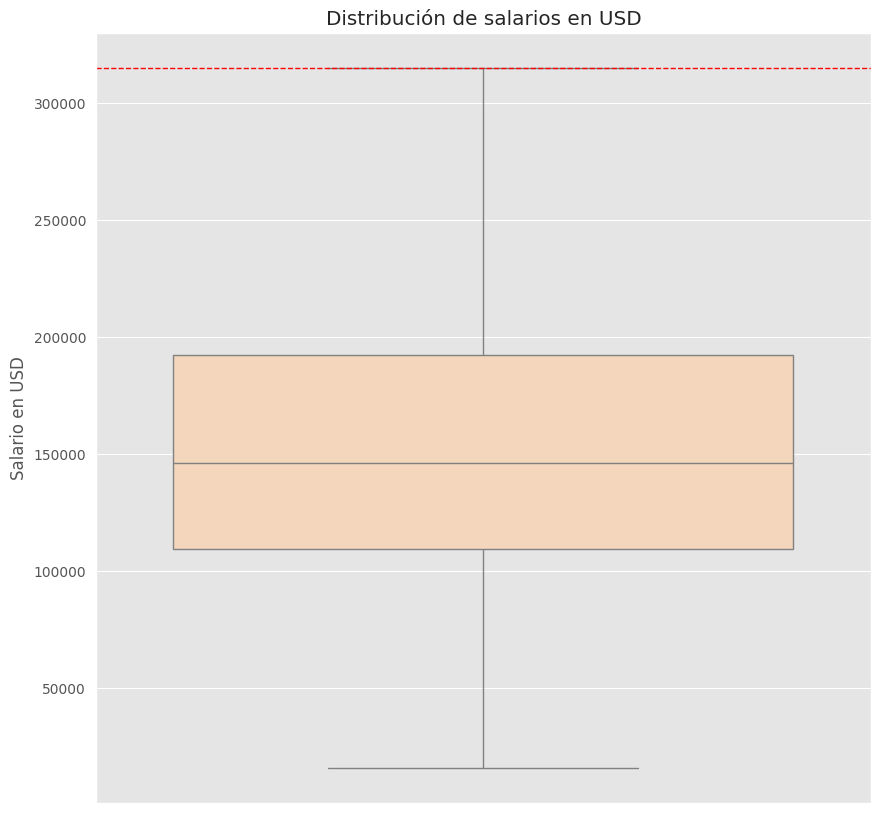

In [44]:
slr_max = 315000

fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y=df_2['salary_in_usd'], color='#FDD5B1')
ax.axhline(slr_max, color='red', linestyle='--',linewidth=1, label=f'Límite de interés: {slr_max}')
plt.title('Distribución de salarios en USD')
plt.ylabel('Salario en USD')
plt.show()


Con los outliers descartados, podemos notar con mayor detalle que el 50% de nuestros datos se encuentra en un rango de entre 100k y 200k USD anuales.

# 3.3 Distribución de valores categoricos

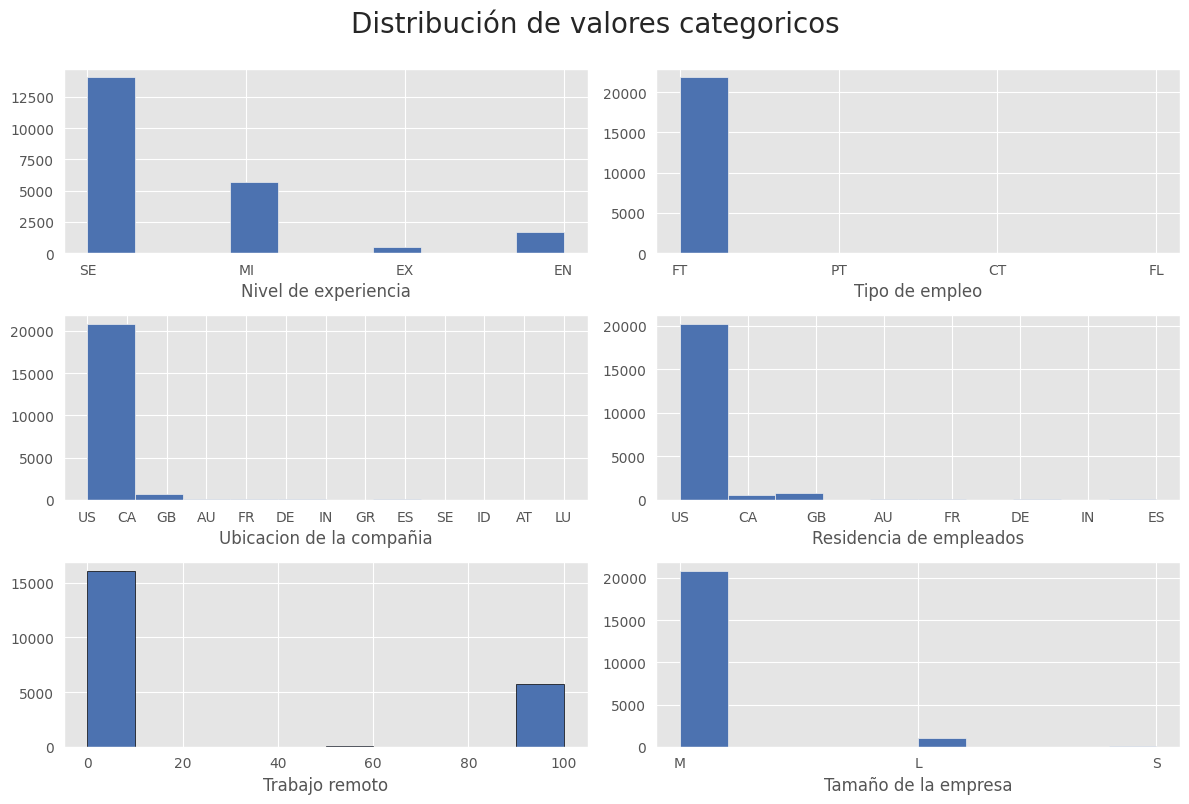

In [19]:
plt.rcParams['figure.figsize'] = (12, 8)



plt.subplots(3,2)
plt.suptitle('Distribución de valores categoricos', fontsize=20, y=1.0)


plt.subplot(3,2,1)
plt.hist(df_2['experience_level'])
plt.xlabel('Nivel de experiencia')


plt.subplot(3,2,2)
plt.hist(df_2['employment_type'])
plt.xlabel('Tipo de empleo')


plt.subplot(3,2,3)
plt.hist(df_2['company_location'])
plt.xlabel('Ubicacion de la compañia')



plt.subplot(3,2,4)
plt.hist(df_2['employee_residence'])
plt.xlabel('Residencia de empleados')


plt.subplot(3,2,5)
plt.hist(df_2['remote_ratio'], edgecolor='black')
plt.xlabel('Trabajo remoto')


plt.subplot(3,2,6)
plt.hist(df_2['company_size'])
plt.xlabel('Tamaño de la empresa')

plt.tight_layout()

plt.show()

# Variables categóricas
#cat_cols = ['job_title', 'employee_residence', 'experience_level', 'employment_type', 'company_location', "company_size"]


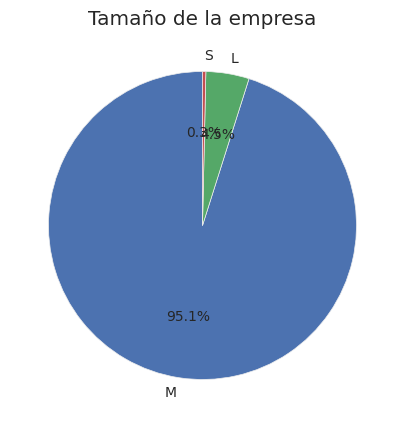

In [20]:
fig, ax = plt.subplots(figsize=(7, 5))

plt.title ('Tamaño de la empresa')
plt.pie(df_2['company_size'].value_counts(), labels=df_2['company_size'].value_counts().index, autopct='%1.1f%%', startangle=90 )
plt.show()



### Información obsevable:

  1. USA domina en los campos de residencia y ubicación de compañia
  2. Más del 95% de las empresas son de tamaño mediano
  3. El tipo de empleo más comun es el FT
  4. Hay más gente con experiencia SE que de cualquier otro grupo

Text(0.5, 1.0, 'Salario por experiencia')

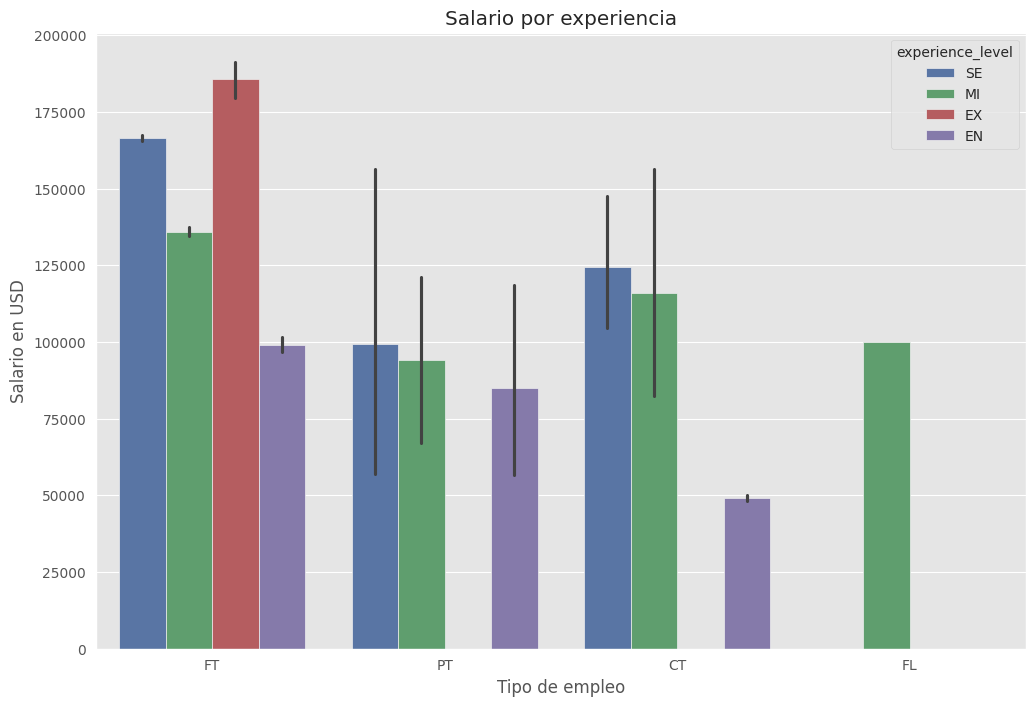

In [21]:
sns.barplot(data=df_2, x='employment_type', y= "salary_in_usd", hue='experience_level')
plt.xlabel('Tipo de empleo')
plt.ylabel('Salario en USD')
plt.title('Salario por experiencia')

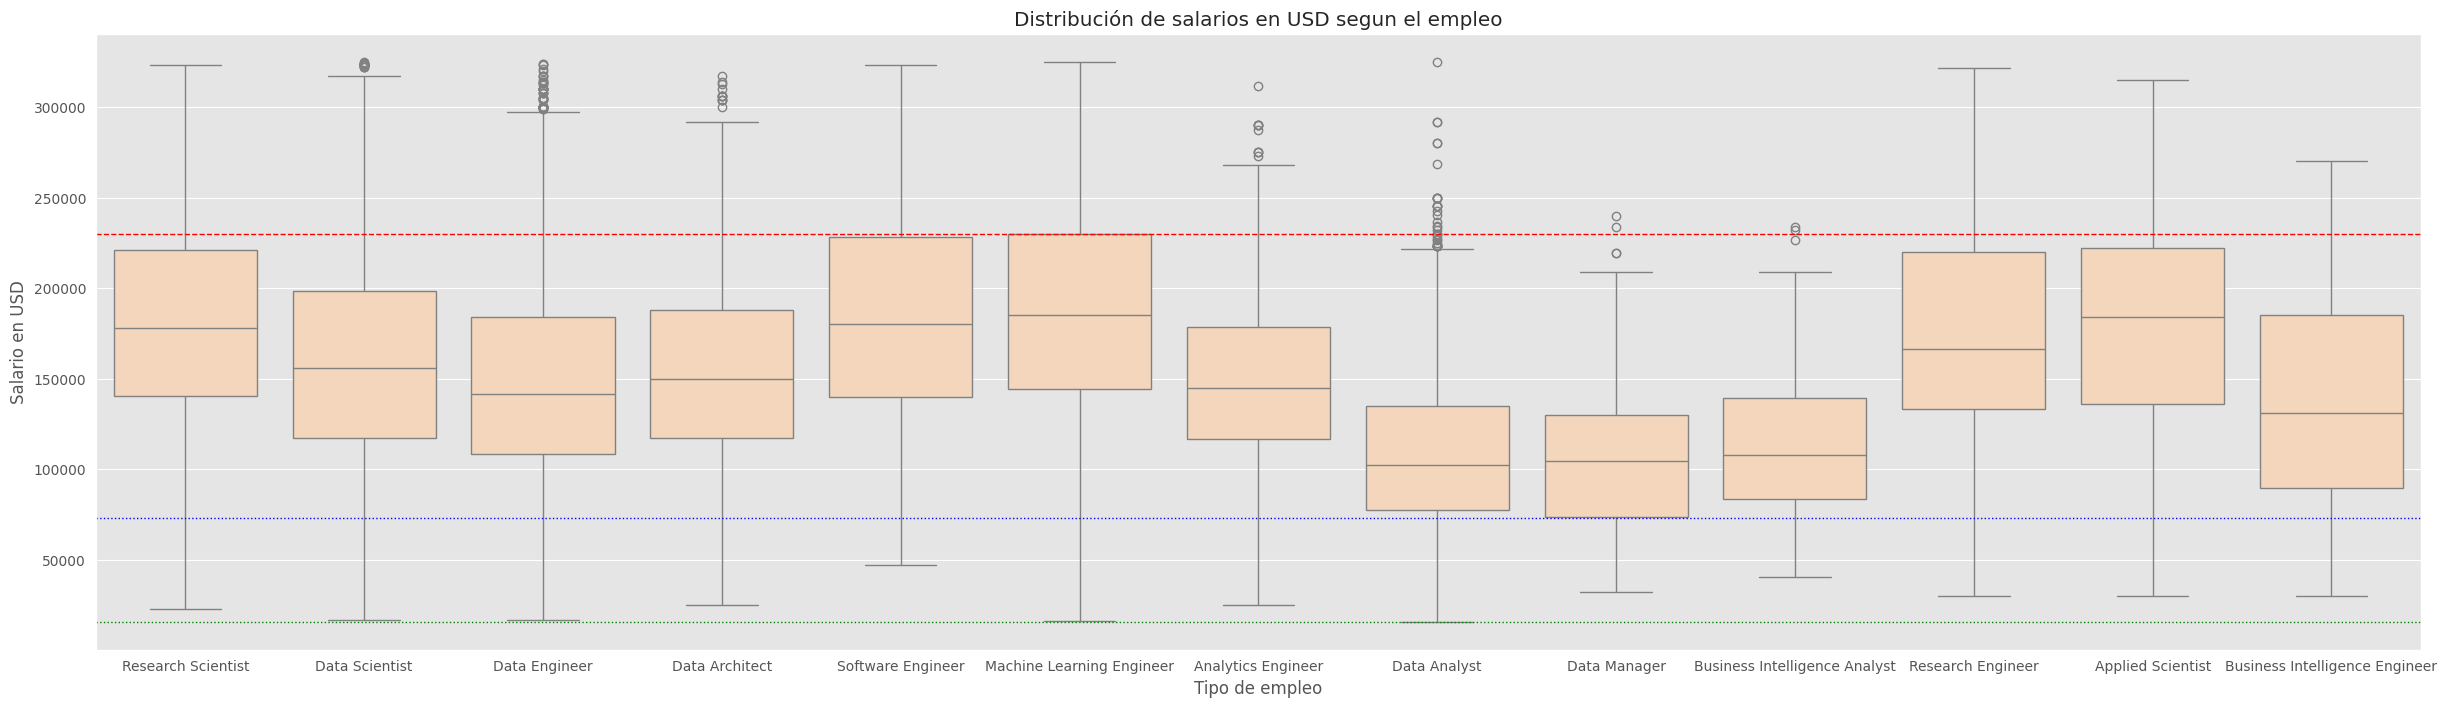

In [22]:
fig, ax = plt.subplots(figsize=(30, 8))
usd_max = 230000
usd_min = 73000
slr_min = df_2['salary_in_usd'].min()
sns.boxplot(y=df_2['salary_in_usd'], x=df_2['job_title'], color='#FDD5B1')
ax.axhline(usd_max, color='red', linestyle='--',linewidth=1, label=f'Límite de interés: {usd_max}')
ax.axhline(usd_min, color='blue', linestyle=':',linewidth=1, label=f'Límite de interés: {usd_min}')
ax.axhline(slr_min, color='green', linestyle=':',linewidth=1, label=f'Límite de interés: {slr_min}')
plt.xlabel('Tipo de empleo')
plt.ylabel('Salario en USD' )
plt.title('Distribución de salarios en USD segun el empleo')
plt.show()

Aproximadamente los valores más comunes de salarios por profesión oscilan desde los 70,000 USD hasta los 23,0000 USD, mientras que el salario más bajo de todos es de 15809 USD.

Text(0.5, 1.0, 'Salario por experiencia')

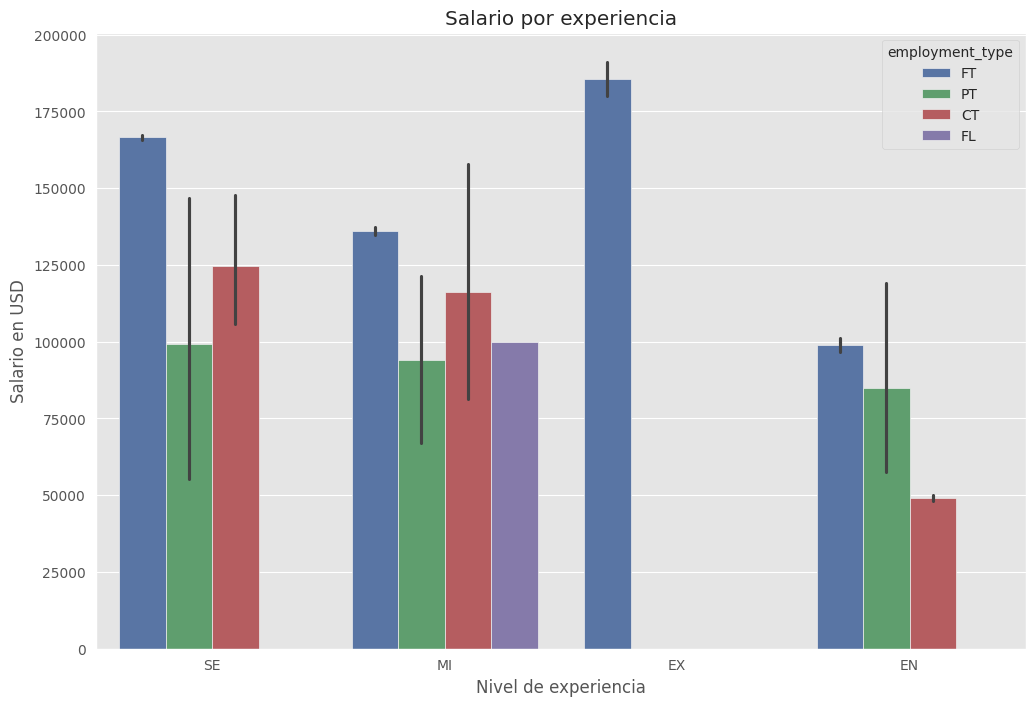

In [23]:
sns.barplot(data=df_2, x='experience_level', y= "salary_in_usd", hue='employment_type')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en USD')
plt.title('Salario por experiencia')

In [24]:
df_2.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Research Scientist,300200,USD,300200,US,0,US,M
1,2024,SE,FT,Research Scientist,170700,USD,170700,US,0,US,M
2,2024,SE,FT,Data Scientist,251600,USD,251600,US,0,US,M


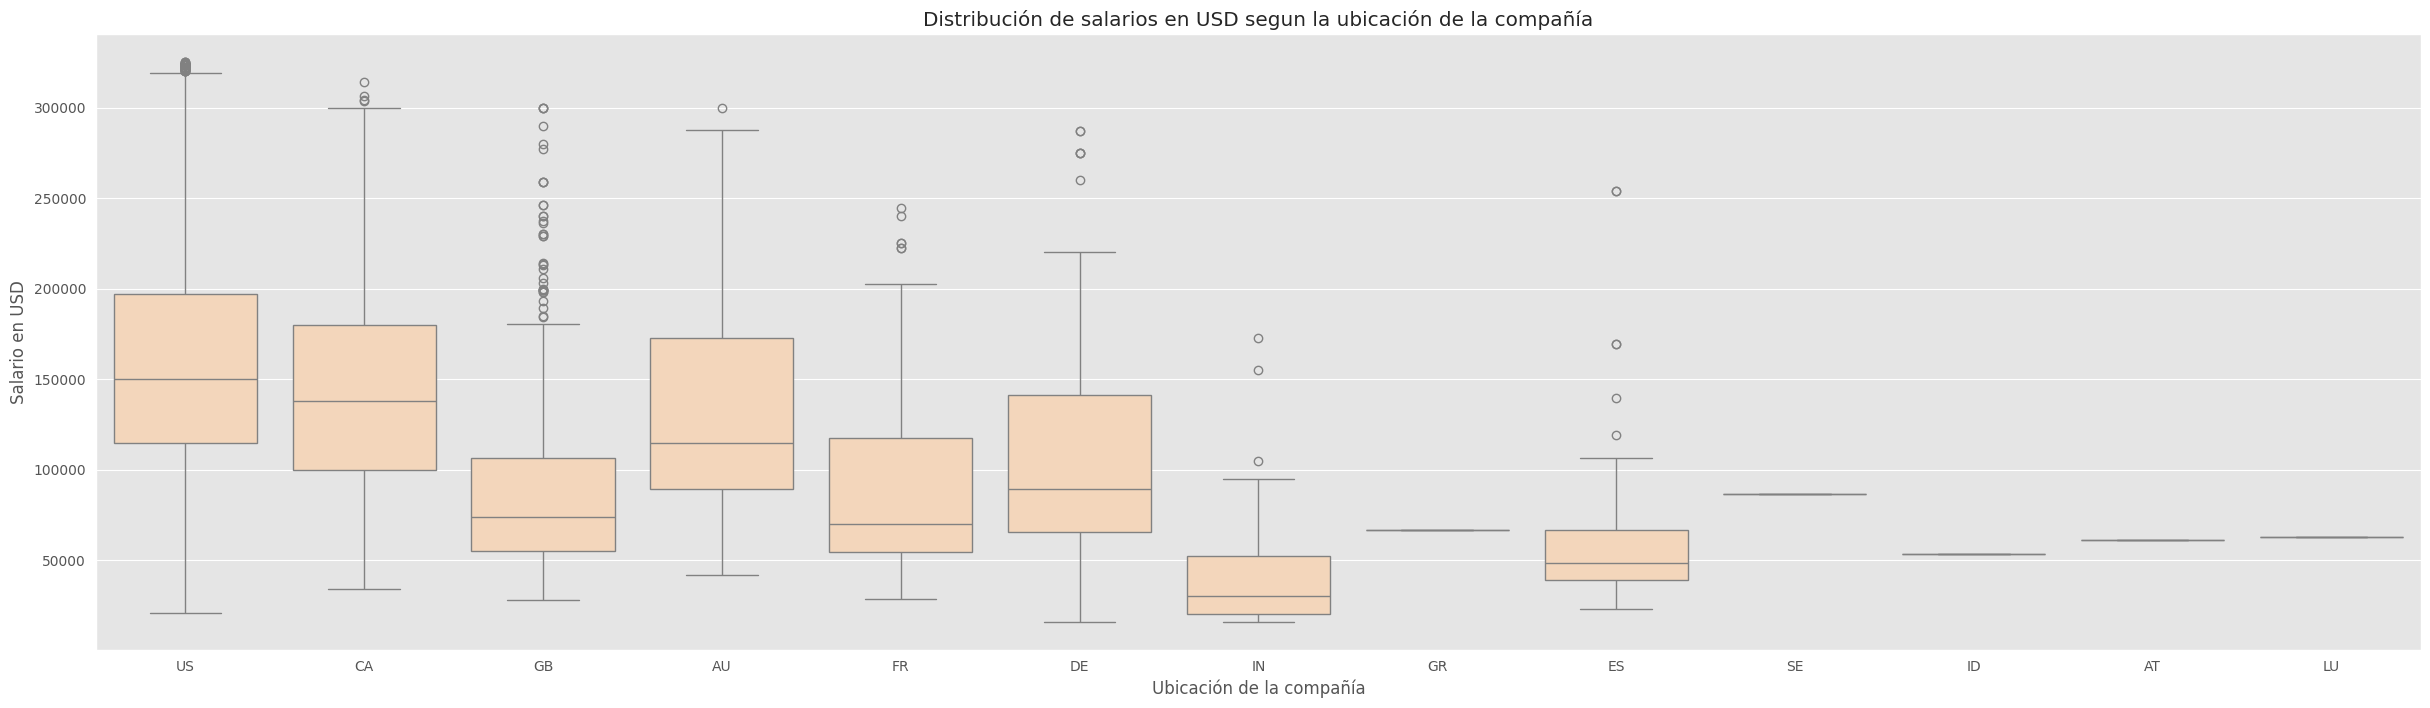

In [25]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.boxplot(y=df_2['salary_in_usd'], x=df_2['company_location'], color='#FDD5B1')
plt.xlabel('Ubicación de la compañía')
plt.ylabel('Salario en USD' )
plt.title('Distribución de salarios en USD segun la ubicación de la compañía')
plt.show()

Analizando los dos graficos anteriores podemos darnos cuentas de varias cosa:
 * La primera de ellas es que en general los trabajos de **"tiempo completo"** son los que reciben una mayor cantidad de ingresos, además de ser **el unico en el que se encuentran** aquellos que tienen un nivel de experiencia **"EX"**(ejecutivo).
 * La segunda es que, en promedio, los trabajos de **"tiempo parcial"** son los segundos que menos ingresos generan (seguido por el Independiente).
 * En tercer lugar podemos ver que los **"EN"(Junior) tienen el ingreso mas bajo**, mientras que el de los "SE"(Experto) y "MI"(Intermedio) está bastante igualado.
 * Por ultimo podemos notar que **el grupo de trabajo "FR" (Independiente), es el más pequeño de todos**, ya que los unicos que se dedican a este campo son aquellos con un nivel de experiencia Intermedio, y ningun otro grupo.

In [26]:
#Los trabajadores de nivel ejecutivo no aparecen en ningun otro tipo de trabajo que no sea el de tiempo completo.
print('\nTrabajos a los que el nivel ejecutivo pertenece que no sea "Tiempo completo"\n---------------------------------------------------------------------------')
df_2[(df_2['experience_level'] == 'EX') & (df_2['employment_type']!= 'FT')][['experience_level', 'employment_type']]


Trabajos a los que el nivel ejecutivo pertenece que no sea "Tiempo completo"
---------------------------------------------------------------------------


,experience_level,employment_type


### Observamos que los trabajadores de nivel ejecutivo solo trabajan en modalidad de tiempo completo

In [27]:
#El tipo de trabajo de "FR" no contiene a otro grupo que no sean los de nivel intermedio.
print('\nGrupos que pertenecen al tipo de trabajo independiente que no sean de "Nivel Intermedio"\n-------------------------------------------------------------------------------------------')
df_2[(df_2['experience_level'] != 'MI') & (df_2['employment_type']== 'FL')][['experience_level', 'employment_type']]


Grupos que pertenecen al tipo de trabajo independiente que no sean de "Nivel Intermedio"
-------------------------------------------------------------------------------------------


,experience_level,employment_type


### Los trabajadores independientes unicamente son personas con experiencia de nivel intermedio.

# 3.4 Ánalisis específico para responder las preguntas de la investigación.


Tras un análisis basto de el conjunto de datos, encontramos mucha información de gran valor, pero la que mas nos intersa son los factores que influyen en el salario aproximado de aquellos que trabajan en el área de datos. Podemos notar que el tipo de modalidad en la que se trabaje aumenta considerablemente el salario del empleado, pues una persona con experiencia baja gana más en modalidad de tiempo completo que en las otras 3 exploradas. Otro factor relevante es el nivel de experiencia, pues con un nivel de experiencia intermedio, puedes competir bastante bien en el campo laboral por un buen salario, no estando muy alejado de los que tienen un conocimiento avanzado.


##Pregunta: ¿Cuáles son los roles con una promedio de salario más alto?


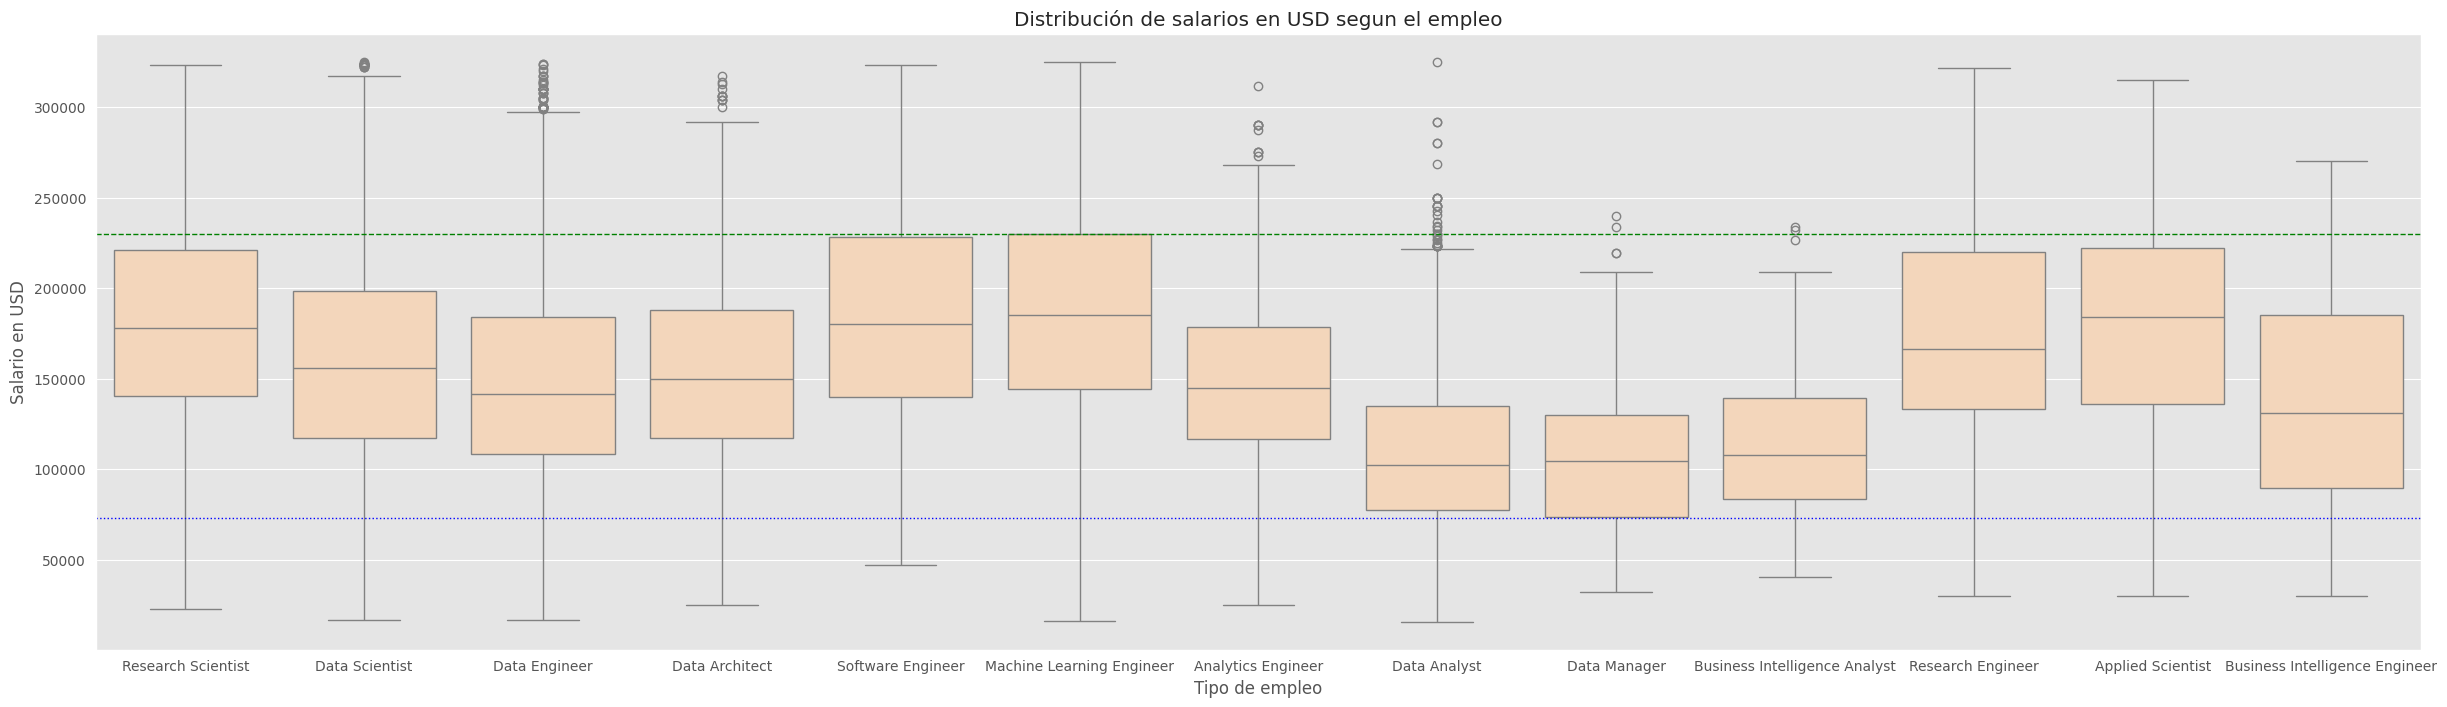

In [28]:
fig, ax = plt.subplots(figsize=(30, 8))
usd_max = 230000
usd_min = 73000
slr_min = df_2['salary_in_usd'].min()
sns.boxplot(y=df_2['salary_in_usd'], x=df_2['job_title'], color='#FDD5B1')
ax.axhline(usd_max, color='green', linestyle='--',linewidth=1, label=f'Límite de interés: {usd_max}')
ax.axhline(usd_min, color='blue', linestyle=':',linewidth=1, label=f'Límite de interés: {usd_min}')
plt.xlabel('Tipo de empleo')
plt.ylabel('Salario en USD' )
plt.title('Distribución de salarios en USD segun el empleo')
plt.show()

Podemos obervar que los empleos que en promedio tienen tendencia a tene run salario más alto son:
  1. Research Scientist.
  2. Research Engineer.
  3. Machine Learning Engieneer.
  4. Software Engieneer.

  Con esta información podemos intuir que el campo que se encarga a la investigación de datos está mejor remunerado que los demás, presentando salarios por encima de los 200k USD anuales.

Además de lo anterior podemos notar que hay dos areas que presentan un promedio de salarios considerablemente menor a los demás, los cuales son:
  1. Data Manager.
  2. Data analyst.
  3. Buisness Intelligence Analyst.


## Pregunta: ¿Qué países son los que presentan una mayor cantidad de personas en el área del manejo de datos?

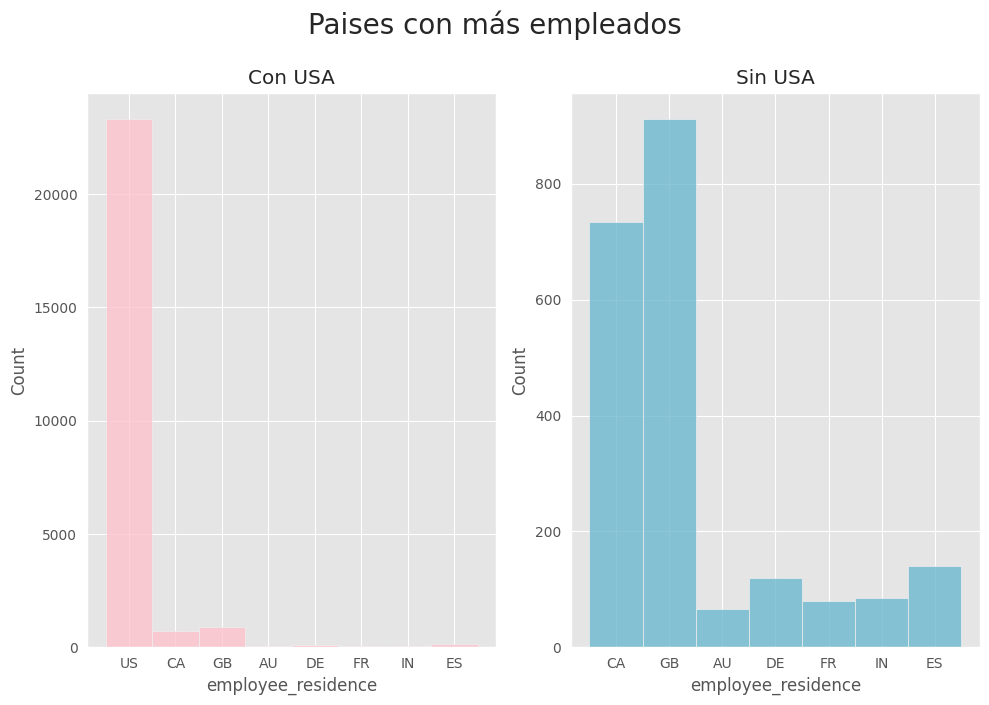

In [29]:
main_countries_no_us = main_countries[main_countries['employee_residence'] != 'US']

fig, axs = plt.subplots(ncols=2, figsize=(10,7))
fig.suptitle('Paises con más empleados', fontsize=20, y=1.0)

sns.histplot(x=main_countries['employee_residence'], ax=axs[0], color='pink')
sns.histplot(x=main_countries_no_us['employee_residence'], ax=axs[1], color='#64B5CD')

axs[0].set_title('Con USA')
axs[1].set_title('Sin USA')

plt.tight_layout()
plt.show()

Para empezar podemos notar que Estados Unidos predomina en cuanto a cantidad de personas presentes en el mundo del manejo de data, con un total aproximado de >20k personas en el campo, sin embargo, si excluimos a EUA de el conteo, nos damos cuenta de que los paises que más predominan en el mundo de la data son:

1. Estados Unidos (US)
2. Gran Bretaña (GB)  
3. Cánada (CA)
4. España (ES)
5. Alemania (DE)
6. India (IN)
7. Francia (FR)
8. Australia (AU)

Esto probablemente se deba a que grandes empresas de tecnología y que manejan grandes cantidades de datos se encuentran en USA, (como es el ejemplo de GOOGLE, Facebook,Instagram,etc.), por lo que muchas más personas se interesan por participar en el mundo de la data.

## Pregunta: ¿En que roles el trabajo de manera remota es más común?

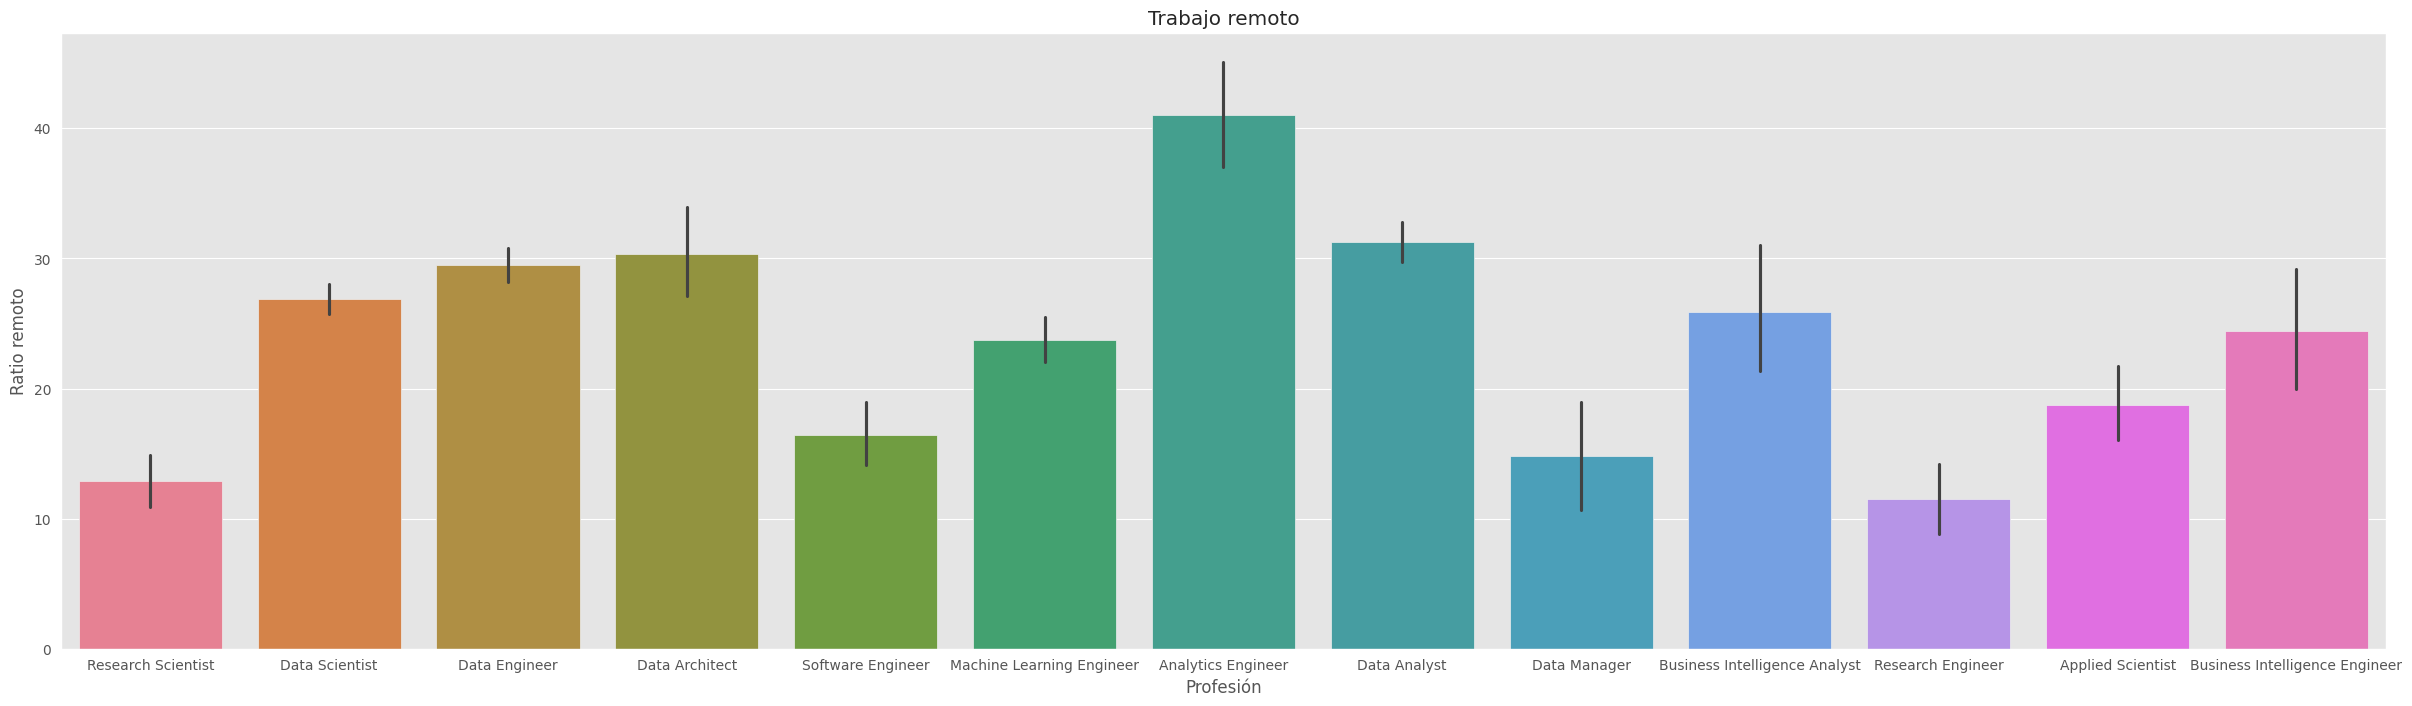

In [30]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.barplot(data=df_2, x='job_title', y= "remote_ratio", hue='job_title')
plt.xlabel('Profesión')
plt.title('Trabajo remoto')
plt.ylabel('Ratio remoto')
plt.show()


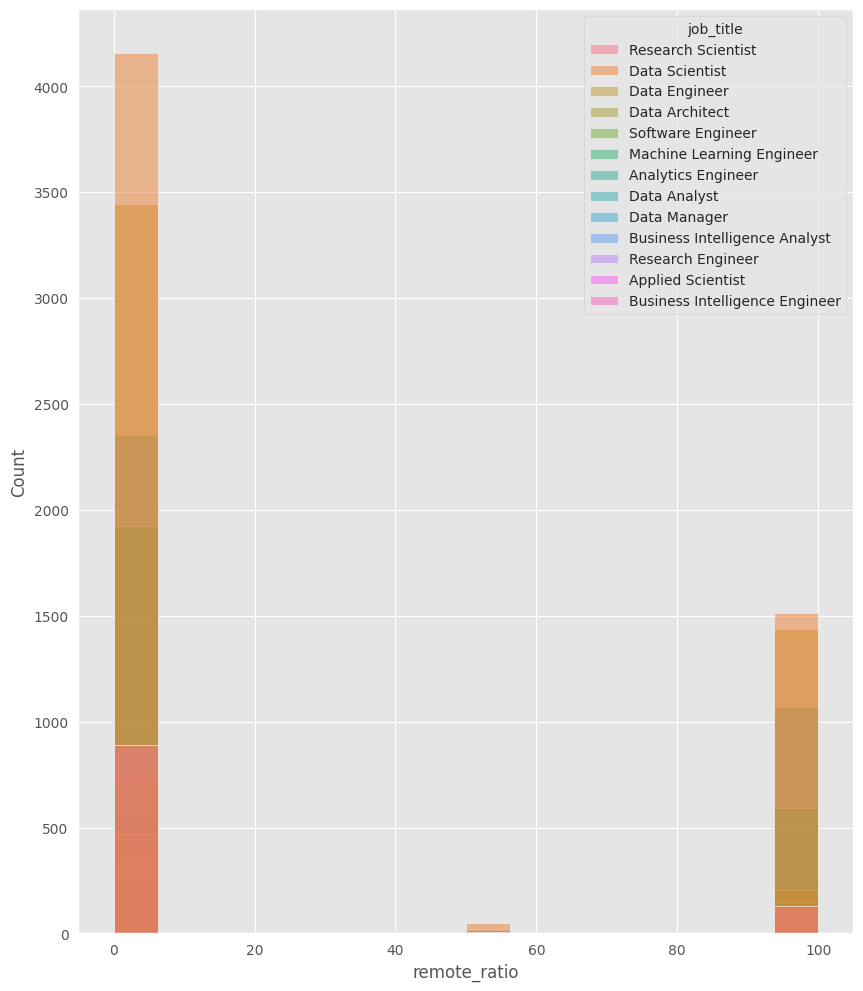

In [31]:
fig, ax = plt.subplots (figsize=(10, 12))
sns.histplot(x=df_2['remote_ratio'], hue= df_2['job_title'], color='#FDD5B1')

plt.show()

Se observa que quienes presentan un mayor ratio de trabajo a distancia son los que trabajan en el campo de la ingenieria de analsis (Analytics engieneer), esto puede deberse a que ellos no manejan directamente datos, si no que mas bien se encargnan de crear herramientas y metodos para el mejor analisis de información. Por ende, al no tener información sensible o de importancia en su control pueden trabajar a distancia.

## Pregunta:
¿En que países las empresas presentan un salario mas alto?

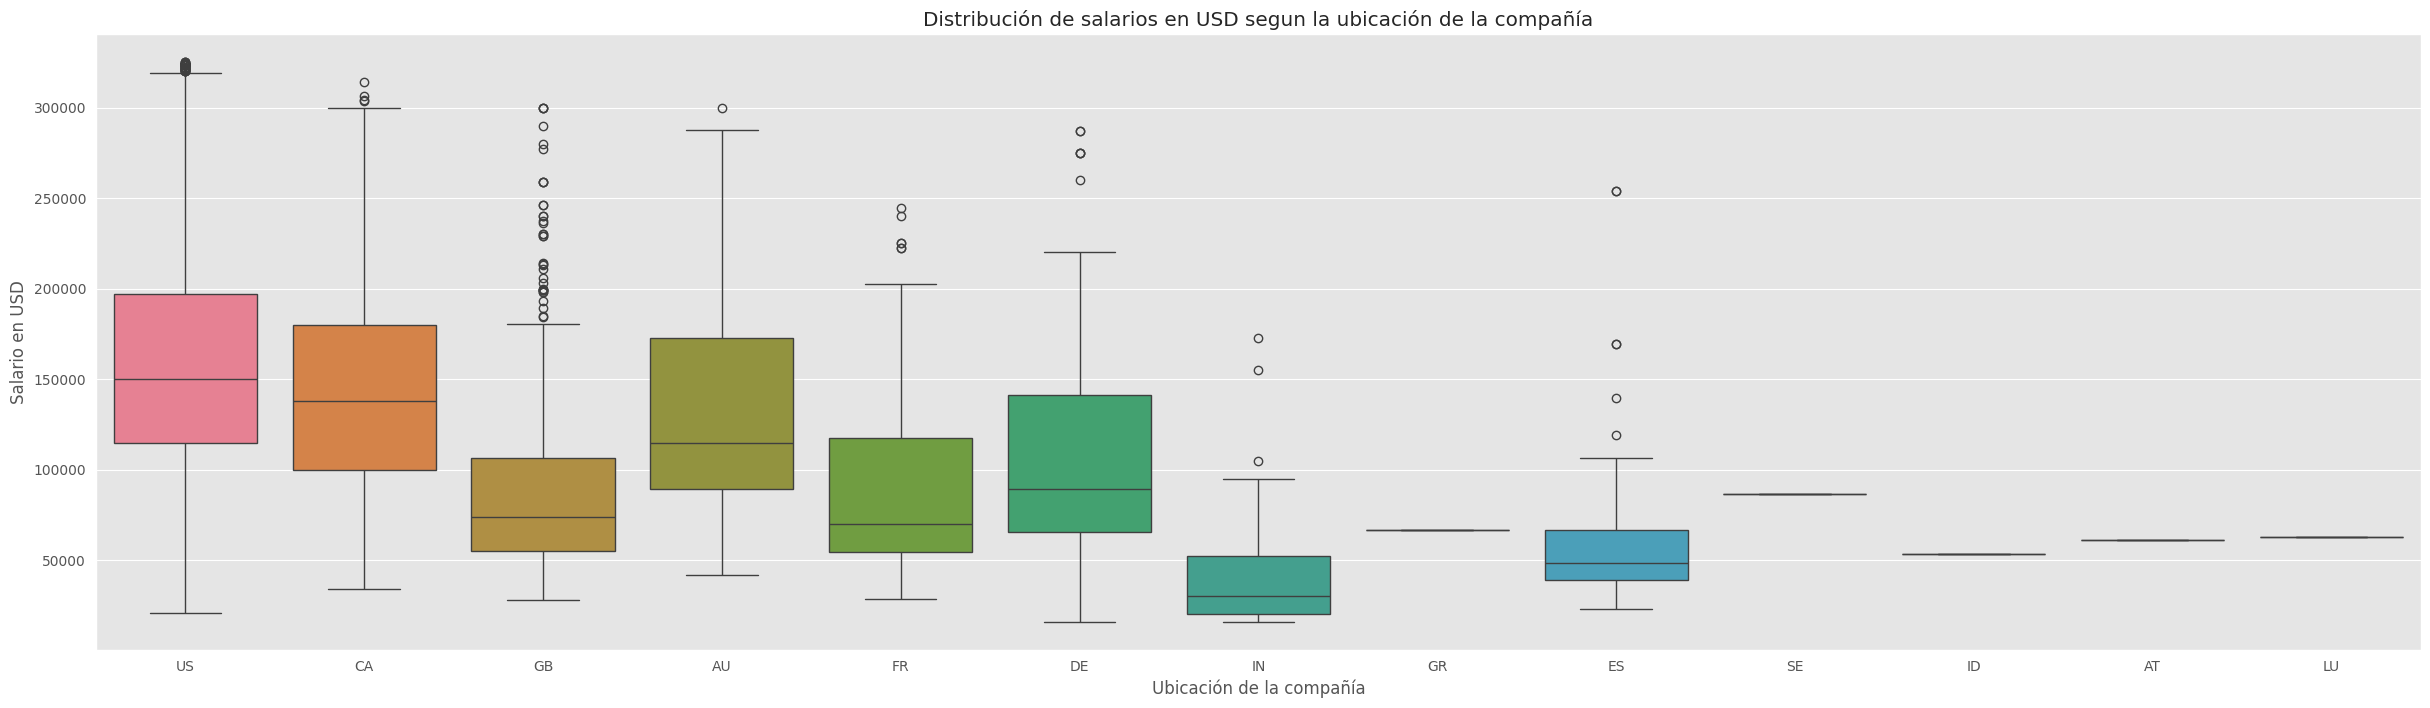

In [32]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.boxplot(y=df_2['salary_in_usd'], x=df_2['company_location'], hue= df_2['company_location'])
plt.xlabel('Ubicación de la compañía')
plt.ylabel('Salario en USD' )
plt.title('Distribución de salarios en USD segun la ubicación de la compañía')
plt.show()

Nos podemos dar cuenta de que en general las compañias de los países de USA, Canadá y Australia son las que tienen un mejor salario con respecto a las de los demás países

# 4 Ingeniería de atributos

Conversion de variables categoricas a dummies

In [33]:
#Obtencion de dummies de variables categóricas y eliminación de las variables categóticas originales del dataframe
df_3 = pd.get_dummies(df_2, columns=['job_title', 'experience_level', 'company_location', 'employment_type','company_size'], drop_first=True)


Normalización de salario y ratio de trabajo remoto.

In [34]:
#Se normaliza el ratio de trabajo remoto para un mejor rendimiento del ML.
scaler = MinMaxScaler()
df_3[['remote_ratio']] = scaler.fit_transform(df_3[['remote_ratio']])


Discretización de variables numéricas.

```
#bins = pd.cut(df_3['salary_in_usd'], 4, labels=['Bajo', 'Medio', 'Alto', 'Muy alto'])
#df_3['salary_in_usd_bin'] = bins

# Conversion a dummies ya que se convierte en una variable categorica
#cat_list = pd.get_dummies(df_3['salary_in_usd_bin'], prefix='salary_in_usd')
#df_3 = df_3.join(cat_list, lsuffix='_original', rsuffix='_dummy') # Add suffixes to distinguish overlapping columns

#df_3.drop(columns=['salary_in_usd_bin'], inplace=True)

#df_3.head()
```



In [35]:
X = df_3.drop(['salary_currency','salary','salary_in_usd','work_year','employee_residence'], axis=1)
y = df_3['salary_in_usd']

# Conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree


# Modelo

bins = pd.cut(df_3['salary_in_usd'], 4, labels=['Bajo', 'Medio', 'Alto', 'Muy alto'])
df_3['salary_in_usd_bin'] = bins

#conversion a dummies ya que se convierte en una variable categorica
cat_list = pd.get_dummies(df_3['salary_in_usd_bin'], prefix='salary_in_usd')
df_3 = df_3.join(cat_list, lsuffix='_original', rsuffix='_dummy') # Add suffixes to distinguish overlapping columns

df_3.drop(columns=['salary_in_usd_bin'], inplace=True)

# df_3.head()
dt = DecisionTreeClassifier(random_state=42)


fig = plt.figure(figsize=(18,10))

# Entrenamiento
dt.fit(X_train, y_train)

# Predicción
y_pred = dt.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Precisión del modelo de árbol de decisión:", accuracy)

Mean Squared Error: 761517657.866895
Precisión del modelo de árbol de decisión: 0.09269406392694064


<Figure size 1800x1000 with 0 Axes>

random forest
arbol de decisión


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_3.drop(['salary_currency','salary','salary_in_usd','work_year','employee_residence'], axis=1)
y = df_3['salary_in_usd']

# Conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)
y_pred_forest = model.predict(X_test)
# Evaluación


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 413639712.98849916
R-squared: 0.8865419212945277


In [ ]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred_forest = random_forest.predict(X_test)

# Evaluar el modelo
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("\RandomForestRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_forest}")
print(f"Coeficiente de Determinación (R^2): {r2_forest}")

In [ ]:
# Gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_forest, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos (Random Forest)')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Assuming 'job_title_Software Engineer' and 'job_title_' are the actual class labels in your target variable
target_names = sorted(y_train.unique())

print('Informe de Clasificación:')
print(classification_report(y_test, y_pred, target_names=target_names))



# If you want to extract unique class labels from a column in df_3, use:
# target_names = df_3['relevant_column'].unique().tolist()
# Crear el modelo K-NN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo
knn.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar el informe de clasificación
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred, target_names=target_names))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(df_3.describe())

In [ ]:
df_3.info()


In [ ]:
df_4= df_3[df_3.drop('salary_currency')]
df_4.corr()